In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/MedicalExpert-I

/content/drive/MyDrive/MedicalExpert-I


In [ ]:
%tensorflow_version 1.x

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.9.2


In [ ]:
import cv2,os
data_path='/content/drive/MyDrive/MedicalExpert-I'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'2Mild': 0, '3Moderate': 1, '1Doubtful': 2, '0Normal': 3, '4Severe': 4}
['2Mild', '3Moderate', '1Doubtful', '0Normal', '4Severe']
[0, 1, 2, 3, 4]


# New Section

In [ ]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from keras.utils import np_utils
new_label=np_utils.to_categorical(label)

In [ ]:
new_label.shape

(1650, 5)

In [ ]:
data.shape

(1650, 256, 256, 1)

In [ ]:
data.shape[1:]

(256, 256, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     1280      
                                                                 
 activation (Activation)     (None, 254, 254, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

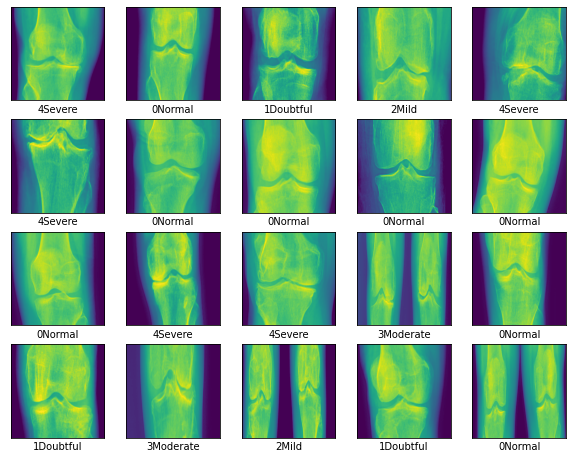

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [ ]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 389s 10s/step - loss: 1.5557 - accuracy: 0.3131 - val_loss: 1.5423 - val_accuracy: 0.2694
Epoch 2/100
38/38 [==============================] - 383s 10s/step - loss: 1.5093 - accuracy: 0.3468 - val_loss: 1.5246 - val_accuracy: 0.3367
Epoch 3/100
38/38 [==============================] - 381s 10s/step - loss: 1.5047 - accuracy: 0.3207 - val_loss: 1.5096 - val_accuracy: 0.3199
Epoch 4/100
38/38 [==============================] - 385s 10s/step - loss: 1.4561 - accuracy: 0.3510 - val_loss: 1.4623 - val_accuracy: 0.3367
Epoch 5/100
38/38 [==============================] - 384s 10s/step - loss: 1.4146 - accuracy: 0.3855 - val_loss: 1.4369 - val_accuracy: 0.3670
Epoch 6/100
38/38 [==============================] - 380s 10s/step - loss: 1.3894 - accuracy: 0.3855 - val_loss: 1.4683 - val_accuracy: 0.3502
Epoch 7/100
38/38 [==============================] - 384s 10s/step - loss: 1.3558 - accuracy: 0.4200 - val_loss: 1.3971 - val_accuracy: 0.3872